In [1]:
import pandas as pd
import csv
import scipy as sp
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import sklearn as sk
from sklearn import preprocessing
import math
from scipy import stats
import statsmodels
import numpy.polynomial.polynomial as poly

LoadData = "../data/ExpSepPos.csv"

df = pd.read_csv(LoadData, index_col = False)

In [2]:
def get_cube_root(num):
    return num ** (1. / 3)

In [3]:
print(df.shape)
df.head()

(53710, 33)


,GameId,PlayId,Season,Team,Passer,Receiver,position[player],Nearest Defender,Nearest Def Position,Opp,...,Air Yds,Air Dist,Air Time,TTT,QB Sep,QBP,Scr Yds,SL Dist,QB (MPH),EZ Dist
0,2018121610,485,2018,NE,Tom Brady,Chris Hogan,WR,Artie Burns,CB,PIT,...,20.97,30.203684,1.321,3.481,1.291201,1,7.57,11.760000,2.025000,52.029999
1,2018101411,2051,2018,BAL,Joe Flacco,Michael Crabtree,WR,Kevin Byard,FS,TEN,...,6.00,25.245205,1.135,1.501,4.759349,0,0.78,4.450000,1.779545,51.000000
2,2017102200,3694,2017,TB,Jameis Winston,O.J. Howard,TE,Lorenzo Alexander,OLB,BUF,...,31.05,50.626010,2.739,4.059,2.687452,0,16.67,2.943331,5.297727,11.949997
3,2017110502,975,2017,JAX,Blake Bortles,Marcedes Lewis,TE,Shawn Williams,SS,CIN,...,26.29,40.024857,2.197,5.220,1.933132,1,3.56,7.070000,3.477273,18.709999
4,2019101307,132,2019,ATL,Matt Ryan,Austin Hooper,TE,Terrell Suggs,OLB,ARI,...,3.49,23.068350,1.068,3.403,2.595997,0,5.21,7.460000,1.963636,49.489998


# Clean Data 

In [8]:
df_1 = df.drop(['Nearest Def Position','Comp Prob %','GameId', 'PlayId','Down', 'Team', 'Nearest Defender', 'Cmp', 'Scr Yds','To Go', 'Opp', 'Wk', 'Qtr', 'Pass Yds', 'INT', 'TD', 'Passer', 'Time', 'QBP'],axis=1)
df_1 = df_1.rename(columns = {'Targeted Receiver Location (Simplified)':'Rec_Loc'})
#df_1 = df_1.drop(['Rec_Loc'], axis =1)
df_1 = df_1.rename(columns = {'position[player]': 'Pos'})
df_1 = df_1.rename(columns = {'cushion[player_play (2)] (SUM)':'Cush'})
df_1 = df_1.rename(columns = {'Target Sep (CUSTOM)':'WR Sep'})
#values = {'Cush': 12.5}
#df_1 = df_1.fillna(value=values)
df_2 = df_1.drop(['Receiver','Season','Pos','Rec_Loc'], axis =1)
#df_1['cr_WR_Sep'] = get_cube_root(df_1["WR Sep"])
#df_1 = df_1.dropna(subset=['Rec_Loc'])
print(df_1.shape)
#df_1['ADxAT'] = df_1['Air Dist']/df_1['Air Time']
df_1.head()

(53710, 14)


,Season,Receiver,Pos,Rec_Loc,Cush,WR Sep,Air Yds,Air Dist,Air Time,TTT,QB Sep,SL Dist,QB (MPH),EZ Dist
0,2018,Chris Hogan,WR,Slot,5.58,19.226980,20.97,30.203684,1.321,3.481,1.291201,11.760000,2.025000,52.029999
1,2018,Michael Crabtree,WR,Wide,12.75,18.945078,6.00,25.245205,1.135,1.501,4.759349,4.450000,1.779545,51.000000
2,2017,O.J. Howard,TE,Tight,NaN,18.633497,31.05,50.626010,2.739,4.059,2.687452,2.943331,5.297727,11.949997
3,2017,Marcedes Lewis,TE,Tight,NaN,17.850281,26.29,40.024857,2.197,5.220,1.933132,7.070000,3.477273,18.709999
4,2019,Austin Hooper,TE,Tight,5.22,17.593319,3.49,23.068350,1.068,3.403,2.595997,7.460000,1.963636,49.489998


# Remove Outliers

In [5]:
df_1 = df_1[df_1['WR Sep'] <= 12]  

In [32]:
#df_1 = pd.get_dummies(df_1)

# Data Visualization

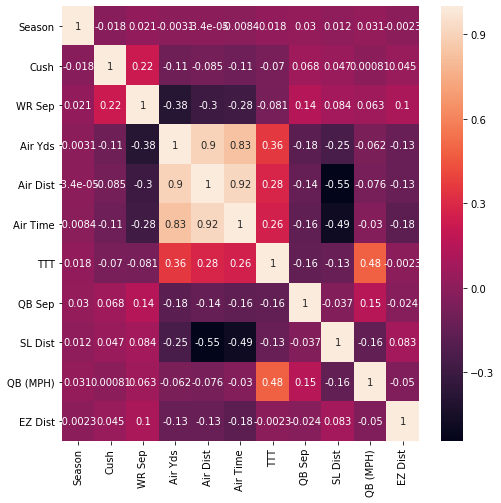

In [6]:
plt.subplots(figsize=(8,8))
sns.heatmap(df_1.corr(), annot = True, fmt='.2g')

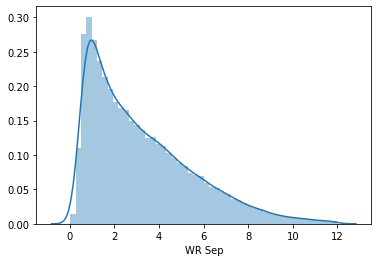

In [7]:
sns.distplot(df_1['WR Sep'])

In [34]:
# Box Plot/ Violet Plot of categorical data (rec loc, season, nearest def pos)

In [25]:
Wide_df = df_1[df_1['Rec_Loc'] == "Wide"]
Wide_df = Wide_df[['WR Sep']]

Backfield_df = df_1[df_1['Rec_Loc'] == "Backfield"]
Backfield_df = Backfield_df[['WR Sep']]

Slot_df = df_1[df_1['Rec_Loc'] == "Slot"]
Slot_df = Slot_df[['WR Sep']]

Tight_df = df_1[df_1['Rec_Loc'] == "Tight"]
Tight_df = Tight_df[['WR Sep']]

WR Sep    9846
dtype: int64

In [24]:
sp.stats.ttest_ind(Backfield_df['WR Sep'], Wide_df['WR Sep'], equal_var = False, nan_policy = 'omit')

Ttest_indResult(statistic=69.04140245923303, pvalue=0.0)

In [26]:
sp.stats.ttest_ind(Slot_df['WR Sep'], Wide_df['WR Sep'], equal_var = False, nan_policy = 'omit')

Ttest_indResult(statistic=15.074003301454077, pvalue=3.4966419346383596e-51)

In [27]:
sp.stats.ttest_ind(Tight_df['WR Sep'], Wide_df['WR Sep'], equal_var = False, nan_policy = 'omit')

Ttest_indResult(statistic=25.387384765483585, pvalue=1.2909593185826747e-136)

In [28]:
sp.stats.ttest_ind(Tight_df['WR Sep'], Slot_df['WR Sep'], equal_var = False, nan_policy = 'omit')

Ttest_indResult(statistic=15.755990192075023, pvalue=3.621348704910499e-55)

In [ ]:
# Welch's T-test for distributions between Wide, Slot, Backfield, Tight
#scipy.stats.ttest_ind

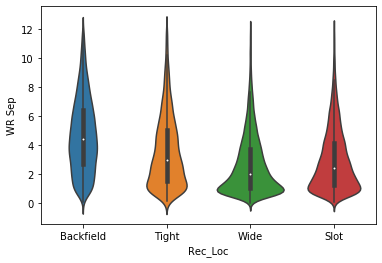

In [8]:
ax = sns.violinplot(x="Rec_Loc", y="WR Sep", data=df_1)

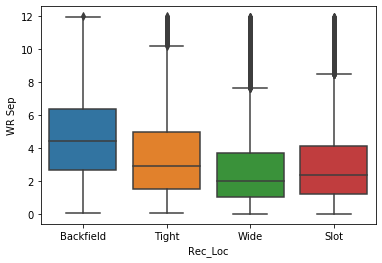

In [9]:
ax = sns.boxplot(x="Rec_Loc", y="WR Sep", data=df_1)

In [10]:
RecLoc_df = df_1[['Rec_Loc', 'WR Sep']]
RecLoc_df.head()
RecLoc_df.groupby(['Rec_Loc']).mean().round({'WR Sep': 2}).sort_values('WR Sep', ascending = False).reset_index()

,Rec_Loc,WR Sep
0,Backfield,4.67
1,Tight,3.52
2,Slot,2.95
3,Wide,2.62


-0.3010095656176298


Text(40, 4.5, 'R^2 = 0.091')

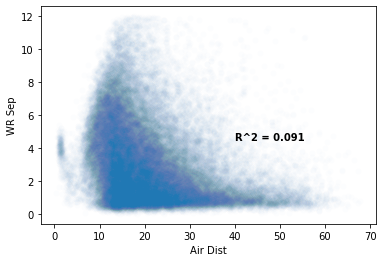

In [16]:
y = df_1["WR Sep"]
x = df_1['Air Dist']
p1 = sns.scatterplot(x,y, alpha = 0.01)
R = x.corr(y)
L = R*R
print(R)
L = round(L, 3)
p1.text(40, 4.5, 'R^2 = {0}'.format(L) , horizontalalignment='left', size='medium', color='black', weight='semibold')

-0.38461017259998737


Text(40, 4.5, 'R^2 = 0.148')

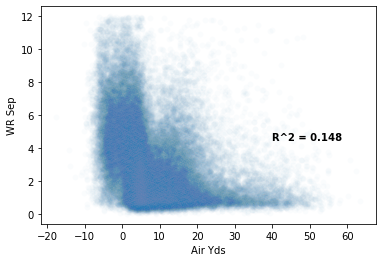

In [20]:
y = df_1["WR Sep"]
x = df_1['Air Yds']
p1 = sns.scatterplot(x,y, alpha = 0.02)
R = x.corr(y)
L = R*R
print(R)
L = round(L, 3)
p1.text(40, 4.5, 'R^2 = {0}'.format(L) , horizontalalignment='left', size='medium', color='black', weight='semibold')

0.22222222808496245


Text(12.5, 5.5, 'R^2 = 0.049')

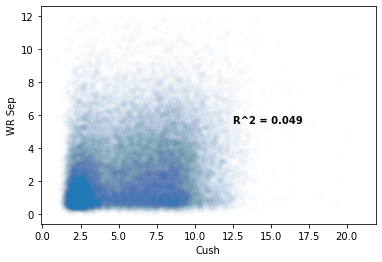

In [23]:
y = df_1["WR Sep"]
x = df_1['Cush']
p1 = sns.scatterplot(x,y, alpha = 0.01)
R = x.corr(y)
L = R*R
print(R)
L = round(L, 3)
p1.text(12.5, 5.5, 'R^2 = {0}'.format(L) , horizontalalignment='left', size='medium', color='black', weight='semibold')

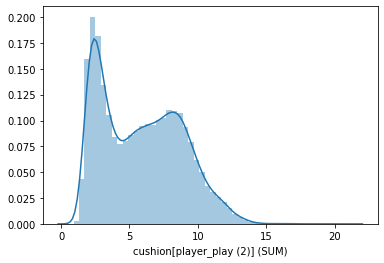

In [15]:
sns.distplot(df.dropna()['cushion[player_play (2)] (SUM)'])

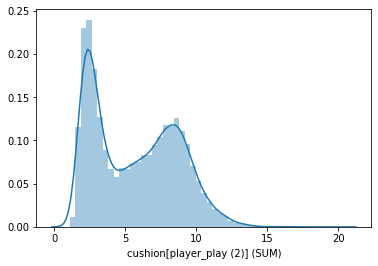

In [94]:
sns.distplot(df.dropna().loc[df.dropna()['Nearest Def Position']=='CB']['cushion[player_play (2)] (SUM)'])


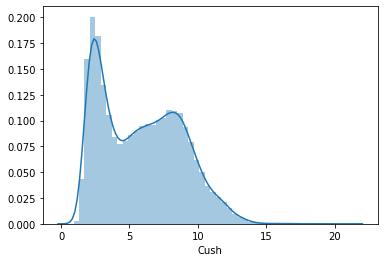

In [93]:
sns.distplot(df_1.dropna()['Cush'])

# Create Columns for 2 Different Air Yard Depths

In [468]:
#df_1['AY_B0'] = 0
#df_1['AY_0_10'] = 0
#df_1['AY_10_20'] = 0
#df_1['AY_20+'] = 0

df_1['AY_B_10'] = 0
df_1['AY_10+'] = 0

#df_1.loc[df_1['Air Yds'] < 0 , ['AY_B0']] = 1
#df_1.loc[(df_1['Air Yds'] >= 0) & (df_1['Air Yds'] < 10), ['AY_0_10']] = 1
#df_1.loc[(df_1['Air Yds'] >= 10) & (df_1['Air Yds'] <= 20), ['AY_10_20']] = 1
#df_1.loc[df_1['Air Yds'] > 20 , ['AY_20+']] = 1

df_1.loc[df_1['Air Yds'] < 10 , ['AY_B_10']] = 1
df_1.loc[df_1['Air Yds'] >= 10 , ['AY_10+']] = 1

#df_1['AY_B0'] = df_1['AY_B0']*df_1['Air Yds']
#df_1['AY_0_10'] = df_1['AY_0_10']*df_1['Air Yds']
#df_1['AY_10_20'] = df_1['AY_10_20']*df_1['Air Yds']
#df_1['AY_20+'] = df_1['AY_20+']*df_1['Air Yds']

df_1['AY_B_10'] = df_1['AY_B_10']*df_1['Air Yds']
df_1['AY_10+'] = df_1['AY_10+']*df_1['Air Yds']

df_1.head(5)


,Season,Receiver,Pos,Rec_Loc,Cush,WR Sep,Air Yds,Air Dist,Air Time,TTT,QB Sep,SL Dist,QB (MPH),EZ Dist,ADxAT,AY_B_10,AY_10+
0,2018,Chris Hogan,WR,Slot,5.58,19.226980,20.97,30.203684,1.321,3.481,1.291201,11.760000,2.025000,52.029999,22.864257,0.00,20.97
1,2018,Michael Crabtree,WR,Wide,12.75,18.945078,6.00,25.245205,1.135,1.501,4.759349,4.450000,1.779545,51.000000,22.242471,6.00,0.00
2,2017,O.J. Howard,TE,Tight,12.50,18.633497,31.05,50.626010,2.739,4.059,2.687452,2.943331,5.297727,11.949997,18.483392,0.00,31.05
3,2017,Marcedes Lewis,TE,Tight,12.50,17.850281,26.29,40.024857,2.197,5.220,1.933132,7.070000,3.477273,18.709999,18.217959,0.00,26.29
4,2019,Austin Hooper,TE,Tight,5.22,17.593319,3.49,23.068350,1.068,3.403,2.595997,7.460000,1.963636,49.489998,21.599579,3.49,0.00


## Add Transformed/Interactive Columns to DF

In [438]:
#df_1['log_air_dist'] = np.log(df_1['Air Dist'])
#df_1['cr_air_yds'] = get_cube_root(df_1["Air Yds"])
#df_1['cr_WR_Sep'] = get_cube_root(df_1["WR Sep"])
#df_1['EZxSL'] = df_1['SL Dist']+df_1['EZ Dist']
#df_1['AD/AT'] = df_1['Air Dist']/df_1['Air Time']
#df_1 = df_1.dropna()

#Scale all input variables from 0-1 to be consistent

print(df_1.shape)

df_1.corr()


(53710, 12)


,Cush,WR Sep,Air Yds,Air Dist,Air Time,TTT,QB Sep,SL Dist,QB (MPH),EZ Dist,AY_B_10,AY_10+
Cush,1.000000,0.332005,-0.336536,-0.300972,-0.253218,-0.009351,0.040530,0.153499,0.080944,0.043450,-0.199608,-0.253319
WR Sep,0.332005,1.000000,-0.375514,-0.283871,-0.265244,-0.066722,0.133880,0.067496,0.061612,0.098555,-0.228724,-0.280612
Air Yds,-0.336536,-0.375514,1.000000,0.898431,0.830729,0.353755,-0.178193,-0.245284,-0.061546,-0.133550,0.043792,0.940128
Air Dist,-0.300972,-0.283871,0.898431,1.000000,0.916973,0.281818,-0.139990,-0.544893,-0.075890,-0.132687,-0.042412,0.872532
Air Time,-0.253218,-0.265244,0.830729,0.916973,1.000000,0.262250,-0.163091,-0.484594,-0.029678,-0.175468,-0.108365,0.830371
TTT,-0.009351,-0.066722,0.353755,0.281818,0.262250,1.000000,-0.156802,-0.132648,0.483873,-0.001603,-0.007530,0.340429
QB Sep,0.040530,0.133880,-0.178193,-0.139990,-0.163091,-0.156802,1.000000,-0.036545,0.151742,-0.023845,-0.088594,-0.139963
SL Dist,0.153499,0.067496,-0.245284,-0.544893,-0.484594,-0.132648,-0.036545,1.000000,-0.155471,0.081764,0.020251,-0.241172
QB (MPH),0.080944,0.061612,-0.061546,-0.075890,-0.029678,0.483873,0.151742,-0.155471,1.000000,-0.049750,-0.133908,-0.013098
EZ Dist,0.043450,0.098555,-0.133550,-0.132687,-0.175468,-0.001603,-0.023845,0.081764,-0.049750,1.000000,0.046492,-0.143410


In [27]:
df_2 = df_1.drop(['SL Dist', 'QB (MPH)','EZ Dist', 'Rec_Loc', 'Pos','Receiver','Season', 'ADxAT', 'WR_Sep_pred' ], axis = 1)
df_2.head()

KeyError: "['ADxAT' 'WR_Sep_pred'] not found in axis"

In [74]:
import pandas as pd
from sklearn import preprocessing

A = df_2.columns
scaler = preprocessing.scale(df_2)
df_sc = pd.DataFrame(scaler)
df_sc.columns = A
df_sc.head()


,Cush,WR Sep,Air Yds,Air Dist,Air Time,TTT,QB Sep,SL Dist,QB (MPH),EZ Dist
0,-0.091676,6.561764,1.280118,0.904830,0.532400,0.812136,-1.347420,-0.228442,-0.452970,0.902840
1,2.328293,6.446028,-0.223381,0.412585,0.194268,-1.241445,1.323278,-1.212210,-0.528286,0.833708
2,NaN,6.318108,2.292494,2.932220,3.110201,1.411616,-0.272216,-1.414975,0.551243,-1.787284
3,NaN,5.996556,1.814428,1.879809,2.124892,2.615761,-0.853091,-0.859614,-0.007350,-1.333560
4,-0.213180,5.891059,-0.475471,0.196482,0.072468,0.731238,-0.342643,-0.807129,-0.471799,0.732358


In [75]:
df_2.head()

,Cush,WR Sep,Air Yds,Air Dist,Air Time,TTT,QB Sep,SL Dist,QB (MPH),EZ Dist
0,5.58,19.226980,20.97,30.203684,1.321,3.481,1.291201,11.760000,2.025000,52.029999
1,12.75,18.945078,6.00,25.245205,1.135,1.501,4.759349,4.450000,1.779545,51.000000
2,NaN,18.633497,31.05,50.626010,2.739,4.059,2.687452,2.943331,5.297727,11.949997
3,NaN,17.850281,26.29,40.024857,2.197,5.220,1.933132,7.070000,3.477273,18.709999
4,5.22,17.593319,3.49,23.068350,1.068,3.403,2.595997,7.460000,1.963636,49.489998


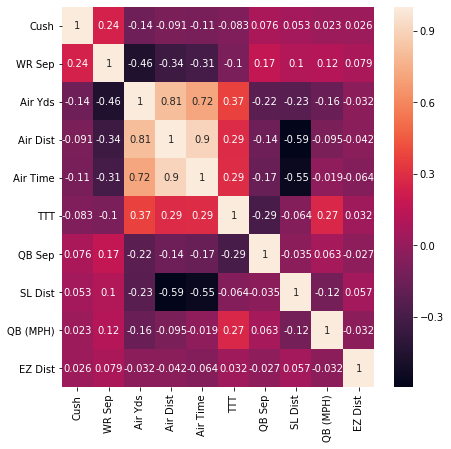

In [77]:
#Lecture 10 slide

plt.subplots(figsize=(7,7))
SC = df_sc.corr(method = 'spearman')
sns.heatmap(df_sc.corr(method = 'spearman'), annot = True, fmt='.2g')

In [626]:
import pandas as pd
from sklearn import preprocessing
A = df_2.columns
x = df_2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_s = pd.DataFrame(x_scaled)
df_s.columns = A
df_s.head()

,Cush,WR Sep,Air Yds,Air Dist,Air Time,TTT,QB Sep,AY_B_10,AY_10+
0,0.233617,1.000000,0.475145,0.441769,0.313065,0.245127,0.088146,0.637255,0.330132
1,0.592296,0.985323,0.290490,0.368297,0.273932,0.092597,0.340149,0.855120,0.000000
2,0.579790,0.969101,0.599482,0.744375,0.611403,0.289654,0.189601,0.637255,0.488822
3,0.579790,0.928323,0.540767,0.587293,0.497370,0.379093,0.134790,0.637255,0.413885
4,0.215608,0.914944,0.259529,0.336042,0.259836,0.239119,0.182955,0.763980,0.000000


# Feature Selection Analysis

In [627]:
import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')

In [628]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [630]:
#from tqdm import tnrange, tqdm_notebook

#Initialization variables
Y = df_2[['WR Sep']]
X = df_2.drop(['WR Sep'], axis = 1)
k = 14
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 15 features in X
for k in range(1,len(X.columns) + 1):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

In [631]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min.head(8))
display(df_max.head(8))

,numb_features,RSS,R_squared,features
1,1,273718.625825,0.141010,"(Air Yds,)"
8,2,258523.725613,0.188695,"(Cush, Air Yds)"
40,3,248992.964912,0.218605,"(Cush, Air Yds, AY_B_10)"
41,3,248992.964912,0.218605,"(Cush, Air Yds, AY_10+)"
56,3,248992.964912,0.218605,"(Cush, AY_B_10, AY_10+)"
95,4,246412.734632,0.226702,"(Cush, Air Yds, Air Dist, AY_B_10)"
169,5,245451.541274,0.229719,"(Cush, Air Yds, Air Dist, QB Sep, AY_B_10)"
170,5,245451.541274,0.229719,"(Cush, Air Yds, Air Dist, QB Sep, AY_10+)"


,numb_features,RSS,R_squared,features
1,1,273718.625825,0.141010,"(Air Yds,)"
8,2,258523.725613,0.188695,"(Cush, Air Yds)"
40,3,248992.964912,0.218605,"(Cush, Air Yds, AY_B_10)"
41,3,248992.964912,0.218605,"(Cush, Air Yds, AY_10+)"
56,3,248992.964912,0.218605,"(Cush, AY_B_10, AY_10+)"
95,4,246412.734632,0.226702,"(Cush, Air Yds, Air Dist, AY_B_10)"
169,5,245451.541274,0.229719,"(Cush, Air Yds, Air Dist, QB Sep, AY_B_10)"
170,5,245451.541274,0.229719,"(Cush, Air Yds, Air Dist, QB Sep, AY_10+)"


In [632]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df.head()

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
0,1,283527.625412,0.110228,"(Cush,)",273718.625825,0.14101
1,1,273718.625825,0.141010,"(Air Yds,)",273718.625825,0.14101
2,1,292974.093416,0.080582,"(Air Dist,)",273718.625825,0.14101
3,1,296233.317015,0.070354,"(Air Time,)",273718.625825,0.14101
4,1,317233.262307,0.004452,"(TTT,)",273718.625825,0.14101


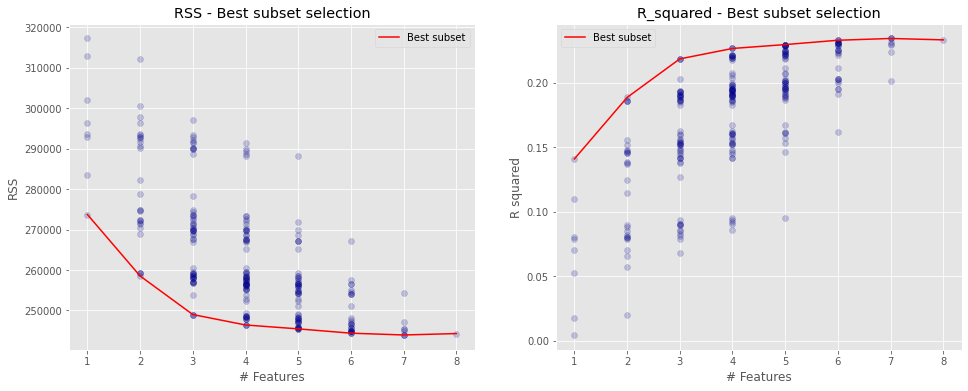

In [633]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

# Train, Test, Split Data

In [480]:
y = df_2[['WR Sep']]
X = df_2[['Cush', 'Air Yds', 'Air Dist', 'AY_B_10', 'AY_10+']]
X_1= X.values
y_1 = y.values

X.head()


,Cush,Air Yds,Air Dist,AY_B_10,AY_10+
0,5.58,20.97,30.203684,0.00,20.97
1,12.75,6.00,25.245205,6.00,0.00
2,12.50,31.05,50.626010,0.00,31.05
3,12.50,26.29,40.024857,0.00,26.29
4,5.22,3.49,23.068350,3.49,0.00


In [482]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train the algorithm 
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [483]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[2.38951176]
[[ 1.28535307e-01  1.62712454e+11  4.97970581e-02 -1.62712454e+11
  -1.62712454e+11]]


In [484]:
y_pred = regressor.predict(X_test)


In [485]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(regressor.intercept_)

Mean Absolute Error: 1.6305887125143408
Mean Squared Error: 4.574061742860591
Root Mean Squared Error: 2.1387056232358375
[2.38951176]


# Compare Results

In [499]:
df_2['CV'] = df_2['Cush']*0.11793405
df_2['AYV'] = df_2['Air Yds']*-0.1547606
df_2['ADV'] = df_2['Air Dist']*0.04680163 
df_2['AY1V'] = df_2['AY_B_10']* -0.11838786
df_2['AY2V'] = df_2['AY_10+']* 0.03965829

df_2['WR_Sep_pred'] = (df_2['CV'] + df_2['AYV'] + df_2['ADV'] + df_2['AY1V'] + df_2['AY2V']+2.76708788)
df_1['WR_Sep_pred'] = (df_2['CV'] + df_2['AYV'] + df_2['ADV'] + df_2['AY1V'] + df_2['AY2V']+2.76708788)
df_2.head()

,Cush,WR Sep,Air Yds,Air Dist,Air Time,TTT,QB Sep,AY_B_10,AY_10+,CV,AYV,ADV,AY1V,AY2V,WR_Sep_pred
0,5.58,19.226980,20.97,30.203684,1.321,3.481,1.291201,0.00,20.97,0.658072,-3.245330,1.413582,-0.000000,0.831634,2.425046
1,12.75,18.945078,6.00,25.245205,1.135,1.501,4.759349,6.00,0.00,1.503659,-0.928564,1.181517,-0.710327,0.000000,3.813373
2,12.50,18.633497,31.05,50.626010,2.739,4.059,2.687452,0.00,31.05,1.474176,-4.805317,2.369380,-0.000000,1.231390,3.036717
3,12.50,17.850281,26.29,40.024857,2.197,5.220,1.933132,0.00,26.29,1.474176,-4.068656,1.873229,-0.000000,1.042616,3.088452
4,5.22,17.593319,3.49,23.068350,1.068,3.403,2.595997,3.49,0.00,0.615616,-0.540114,1.079636,-0.413174,0.000000,3.509052


In [51]:
df_2['WR Sep'].describe()

count    53710.000000
mean         3.244240
std          2.435761
min          0.020000
25%          1.292652
50%          2.613341
75%          4.589033
max         19.226980
Name: WR Sep, dtype: float64

In [495]:
df_2['WR_Sep_pred'].describe()
# Note how minimum expected separation is below 0!

count    53710.000000
mean         3.434869
std          1.222487
min         -0.355382
25%          2.594275
50%          3.224229
75%          4.153881
max          9.114890
Name: WR_Sep_pred, dtype: float64

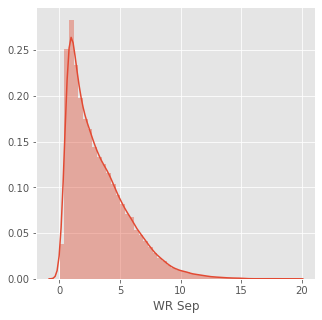

In [488]:
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(df_2['WR Sep'])

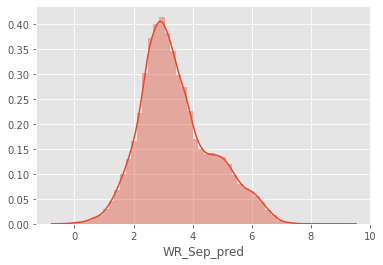

In [498]:
sns.distplot(df_2['WR_Sep_pred'])

#Prediction distribution does not resemble atcual output distribution

#Remove outliers to re-train

# Results

In [582]:
df_3 = df_1[['WR Sep', 'WR_Sep_pred', 'Pos', 'Season', 'Receiver']]
df_3['SOE'] = df_3['WR Sep']-df_3['WR_Sep_pred']
print(df_3.shape)
df_3.head()

(53710, 6)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,WR Sep,WR_Sep_pred,Pos,Season,Receiver,SOE
0,19.226980,2.425046,WR,2018,Chris Hogan,16.801934
1,18.945078,3.813373,WR,2018,Michael Crabtree,15.131705
2,18.633497,3.036717,TE,2017,O.J. Howard,15.596781
3,17.850281,3.088452,TE,2017,Marcedes Lewis,14.761828
4,17.593319,3.509052,TE,2019,Austin Hooper,14.084267


In [583]:
COUNT_df = df_3.groupby(['Receiver', 'Season']).nunique()
COUNT_df = COUNT_df.rename(columns = {'WR Sep':'Targets'})
COUNT_df = COUNT_df[['Targets']]
COUNT_df.head()

Targets
Receiver   Season         
A.J. Brown 2019         94
A.J. Derby 2017         40
           2018          5
A.J. Green 2017        143
           2018         77

In [584]:
ESOE = df_3.merge(COUNT_df, on = ['Receiver', 'Season'])
ESOE.head()

,WR Sep,WR_Sep_pred,Pos,Season,Receiver,SOE,Targets
0,19.226980,2.425046,WR,2018,Chris Hogan,16.801934,73
1,12.055492,2.670115,WR,2018,Chris Hogan,9.385377,73
2,10.407310,4.916260,WR,2018,Chris Hogan,5.491049,73
3,8.610627,4.975363,WR,2018,Chris Hogan,3.635264,73
4,8.218546,2.787814,WR,2018,Chris Hogan,5.430732,73


In [608]:
ESOE_1 = ESOE.query('Targets > 70')
pd.pivot_table(ESOE_1, values='SOE',index='Receiver', columns=['Season']).corr()

Season,2017,2018,2019
Season,,,
2017,1.000000,0.391008,0.279468
2018,0.391008,1.000000,0.612324
2019,0.279468,0.612324,1.000000


In [576]:
COUNTS_df = df_1.groupby(['Receiver']).nunique()
COUNTS_df = COUNTS_df.rename(columns = {'WR Sep':'Targets'})
COUNTS_df = COUNTS_df[['Targets']]
COUNTS_df.head()

,Targets
Receiver,
A.J. Brown,94
A.J. Derby,45
A.J. Green,219
Aaron Jones,128
Aaron Ripkowski,10


In [585]:
df_3 = df_3.groupby(['Receiver', 'Pos', 'Season']).mean().reset_index()
Season_df = df_3.merge(COUNT_df, on = ['Receiver', 'Season'])
Season_df.head(5)

,Receiver,Pos,Season,WR Sep,WR_Sep_pred,SOE,Targets
0,A.J. Brown,WR,2019,2.264605,2.705541,-0.440936,94
1,A.J. Derby,TE,2017,3.148059,3.069762,0.078297,40
2,A.J. Derby,TE,2018,1.569060,3.257779,-1.688719,5
3,A.J. Green,WR,2017,2.353555,2.760961,-0.407406,143
4,A.J. Green,WR,2018,2.028804,2.686763,-0.657959,77


In [600]:
df_2019 = Season_df[Season_df['Season'] == 2019]
df_2019 = df_2019[df_2019['Targets'] > 70].sort_values(['SOE'], ascending = False)
TE_df_2019 = df_2019[df_2019['Pos'] == 'TE']
TE_df_2019.head(5)

,Receiver,Pos,Season,WR Sep,WR_Sep_pred,SOE,Targets
112,Austin Hooper,TE,2019,3.538621,3.220217,0.318403,97
1446,Tyler Higbee,TE,2019,3.681872,3.459660,0.222212,89
641,Jack Doyle,TE,2019,3.531383,3.360330,0.171053,72
709,Jason Witten,TE,2019,3.343906,3.205135,0.138771,82
1403,Travis Kelce,TE,2019,3.047146,2.967638,0.079509,158


In [609]:
WR_df_2019 = df_2019[df_2019['Targets'] > 70].sort_values(['SOE'], ascending = True)
WR_df_2019 = WR_df_2019[WR_df_2019['Pos'] == 'WR']
WR_df_2019.head(10)

,Receiver,Pos,Season,WR Sep,WR_Sep_pred,SOE,Targets
593,Golden Tate,WR,2019,2.169495,3.016369,-0.846874,85
1031,Marvin Jones,WR,2019,2.085532,2.880017,-0.794485,91
104,Auden Tate,WR,2019,2.270225,2.984882,-0.714657,80
837,Julio Jones,WR,2019,2.163855,2.849959,-0.686104,156
896,Kenny Golladay,WR,2019,1.947729,2.619174,-0.671444,113
52,Allen Robinson,WR,2019,2.235598,2.849525,-0.613927,154
1095,Mike Williams,WR,2019,2.003895,2.515296,-0.511401,90
704,Jarvis Landry,WR,2019,2.587291,3.096577,-0.509285,138
1224,Robby Anderson,WR,2019,2.173501,2.681715,-0.508214,96
1435,Tyler Boyd,WR,2019,2.642544,3.129616,-0.487072,148


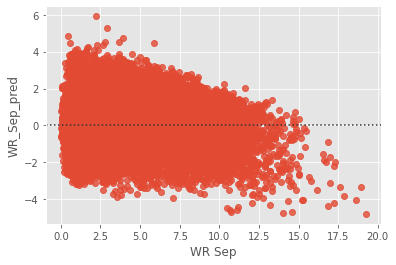

In [523]:
sns.residplot(df_2['WR Sep'], df_2['WR_Sep_pred'])

In [596]:
WR_df_2019 = df_2019[df_2019['Pos'] == 'WR']
WR_df_2019.head(10)

,Receiver,Pos,Season,WR Sep,WR_Sep_pred,SOE,Targets
593,Golden Tate,WR,2019,2.169495,3.016369,-0.846874,85
1031,Marvin Jones,WR,2019,2.085532,2.880017,-0.794485,91
832,JuJu Smith-Schuster,WR,2019,2.373298,3.107643,-0.734345,70
104,Auden Tate,WR,2019,2.270225,2.984882,-0.714657,80
837,Julio Jones,WR,2019,2.163855,2.849959,-0.686104,156
444,Demaryius Thomas,WR,2019,2.479617,3.156845,-0.677228,58
896,Kenny Golladay,WR,2019,1.947729,2.619174,-0.671444,113
52,Allen Robinson,WR,2019,2.235598,2.849525,-0.613927,154
1095,Mike Williams,WR,2019,2.003895,2.515296,-0.511401,90
704,Jarvis Landry,WR,2019,2.587291,3.096577,-0.509285,138


(0.8602323532104492, 1.139461201577887e-34)


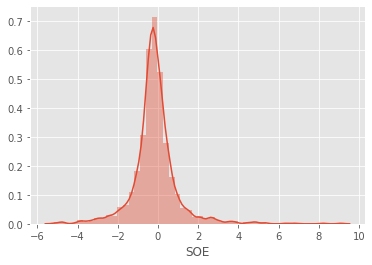

In [525]:
sns.distplot(df_3['SOE'])
print(stats.shapiro(df_3['SOE']))

In [568]:
df_3['SOE'].describe()

count    1513.000000
mean       -0.164351
std         1.140385
min        -5.162299
25%        -0.594507
50%        -0.202687
75%         0.222723
max         9.095044
Name: SOE, dtype: float64